In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
N = 100

In [8]:
ip = np.random.randn(N) > 0.5 
ip = np.array(ip) 

In [9]:
s = 2 * ip - 1        

s = np.array(s) 

In [10]:
eb_no_db = np.arange(30) 

In [11]:
bit_error_rate_zero = np.zeros(len(eb_no_db)) 

In [12]:
def Zero_Forcing_SIC():

    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        received_bits_list = []
        
        
        
        for ii in range(N//2):
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            H = np.array([[h11, h12], [h21, h22]])
            
            n = np.array([[n1], [n2]])
            
            x = np.array([[x1], [x2]])
            
            Hx = np.matmul(H, x)
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20))
            
            H_conjugate = np.conjugate(H)
            
            H_Hermitian = np.transpose(H_conjugate)
            
            H_Hermitian_H = np.matmul(H_Hermitian, H)
            
            rank = np.linalg.matrix_rank(H_Hermitian_H)
            
            invertible = True if np.all(np.isfinite(np.linalg.inv(H_Hermitian_H))) else False
            
            H_inverse = np.linalg.inv(H_Hermitian_H)
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            
            
            Px1 = np.abs(h11)**2 + np.abs(h21)**2
            
            Px2 = np.abs(h12)**2 + np.abs(h22)**2
            
            
            if Px1 > Px2:
                
                h = np.array([[h11],[h12]])
                
                x1_hat = x_hat[0,0]
                
                hx = np.dot(h,x1_hat)
                
                r = y - hx
                
                h_hermitian = np.conjugate(h)
                
                h_hermitian = np.transpose(h)
                
                h_magnitude = np.dot(h_hermitian,h)
                
                x2_hat = np.dot(h_hermitian,r)
                
                x2_hat = x2_hat / h_magnitude
                
                print(x2_hat)
                
                received_bits = np.real(x2_hat > 0)
                
                
                
                m = received_bits[0, 0]
                
                
                
                received_bits_list.append(m)
                
            else:
                
                h = np.array([[h12],[h22]])
                
                x2_hat = x_hat[1,0]
                
                hx = np.dot(h,x2_hat)
                
                r = y - hx
                
                h_hermitian = np.conjugate(h)
                
                h_hermitian = np.transpose(h)
                
                h_magnitude = np.dot(h_hermitian,h)
                
                x1_hat = np.dot(h_hermitian,r)
                
                x1_hat = x1_hat / h_magnitude
                print(x1_hat)
                received_bits = np.real(x1_hat > 0)
                
                
                
                n = received_bits[0, 0]
                
                
                
                received_bits_list.append(n)
                
                
                
   

    nErr = np.sum(np.logical_not(np.array_equal(ip, received_bits_list)))

    bit_error_rate_zero[jj] = nErr / N

    
    return bit_error_rate_zero

            
            
            

[]
[[-0.08717324-0.20034708j]]
[[-0.43566633+0.07522227j]]
[[0.63182253+0.38940734j]]
[[1.1346074-0.54553965j]]
[[-0.3336427+0.41820705j]]
[[0.5259362-0.08891356j]]
[[0.69624343-0.43180476j]]
[[1.90631614-0.57666033j]]
[[-0.2440331-0.42546507j]]
[[-1.39913684+1.26254843j]]
[[-1.57601933+0.04326367j]]
[[0.08658855+0.17091311j]]
[[-0.10144783+0.13175035j]]
[[-0.4789866+0.04819518j]]
[[-0.35135543-0.14922657j]]
[[-0.53493851-1.96190653j]]
[[-0.21405644-0.0539664j]]
[[0.31219413+0.3562976j]]
[[0.9029281-0.19450802j]]
[[-2.32051526-0.19990773j]]
[[-1.78690041+1.19729943j]]
[[3.78331055+0.98164535j]]
[[-0.42111474-0.30054636j]]
[[-0.68272007-0.84331113j]]
[[-0.27905018-0.34516069j]]
[[-2.46337512-1.08074541j]]
[[1.5553458-2.11083386j]]
[[-7.42202907+1.22289453j]]
[[-0.5795936-1.25893778j]]
[[-0.25478818+0.12404386j]]
[[-0.05678943+3.69924777j]]
[[-0.27278257-2.94542772j]]
[[0.71346855+1.93798832j]]
[[-0.06375049+1.98168181j]]
[[-0.0623755+0.03244993j]]
[[0.85581012-0.21339163j]]
[[-2.6486448

[[-2.15278161-3.27345007j]]
[[-0.44298686+0.10677873j]]
[[0.51329292-0.40619798j]]
[[-0.90642873+0.3440684j]]
[[-0.41716817+0.14150626j]]
[[-0.49591371+0.03163542j]]
[[0.73440061-0.4023277j]]
[[-0.12817572-0.02886884j]]
[]
[[-0.62339567+0.5951041j]]
[[-0.19387362+0.17477478j]]
[[-0.55078714-0.15093966j]]
[[0.47365829+0.31334564j]]
[[-0.01127983+0.86579349j]]
[[-0.55705043+0.23261564j]]
[[0.5532736+0.42177202j]]
[[0.40385108+0.2617819j]]
[[-0.28618843-0.12561966j]]
[[-0.45929859+0.26224408j]]
[[-0.13965671+0.34280153j]]
[[-1.88449175-0.35022456j]]
[[-0.61971146-0.12546659j]]
[[0.57502996+0.22632898j]]
[[-0.44833551-0.05631015j]]
[[-0.35949707+0.01552506j]]
[[0.8465811+0.73871482j]]
[[1.20129966-0.30691412j]]
[[-0.15011471+0.04319852j]]
[[-0.48748912-0.13054018j]]
[[-0.61048587-0.47118127j]]
[[1.84212347+0.2390311j]]
[[-0.43511732+0.17063591j]]
[[-0.82396823+0.44729739j]]
[[-0.16932912+0.04887376j]]
[[-0.55664283-0.4691406j]]
[[-0.39818401-0.52175362j]]
[[-0.50770402-0.09908614j]]
[[-0.6

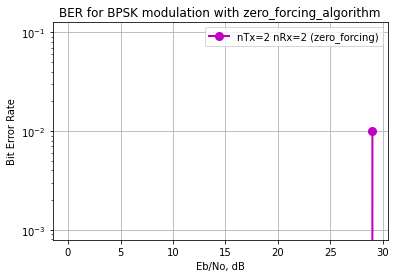

In [13]:
result_zero = Zero_Forcing_SIC()
print(result_zero)
plt.figure()
plt.semilogy(eb_no_db, result_zero, 'mo-', linewidth=2, markersize=8, label='nTx=2 nRx=2 (zero_forcing)')
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with zero_forcing_algorithm')
plt.show()